In [3]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import matplotlib.pyplot as plt
import math
from tqdm import tqdm


#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x = np.random.rand(10, 5)
y = np.random.rand(10, 6)

main loop: 100%|██████████| 5000/5000 [00:18<00:00, 269.50it/s]


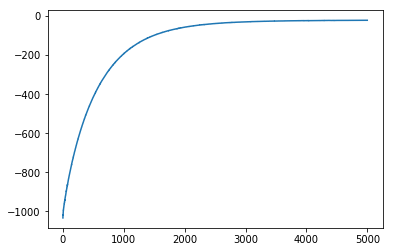

In [145]:
# dimensions for the NN:
# input dimension
N = x.shape[0] # 10
Q = x.shape[1] # 5
# hidden layer dimension
K = 100
# output dimension 
D = y.shape[1] # 6

#1 - p1 : probability of dropping a line of the weight matrix


def gradient_descent_dropout(x, y, p1, p2, sigma, tau, ep=0.0001, max_iter=10000, alpha = 0.0001):
    
    res = []
    converged = False
    iter = 0
    N = x.shape[0] # number of samples
    Q = x.shape[1]
    
    
    # initial weight matrices 
    M1 = np.random.normal(0., 1.,(Q, K))
    M2 = np.random.normal(0., 1., (K, D))                                                                                                              
    m = np.random.normal(0., 1., (1,K))
    L_GP_MC = 0
    
    for _ in tqdm(range(max_iter), desc="main loop"):        
        
        z1v = np.zeros((Q,N))
        z2v = np.zeros((K,N))
    
        for i in range(N):
            z1v[:,i] = np.random.binomial(size=Q, n=1, p=p1)
            z2v[:,i] = np.random.binomial(size=K, n=1, p=p2)        
        
        grad_M1 = np.zeros((Q,K))
        grad_M2 = np.zeros((K,D))
        grad_m = np.zeros((1,K))
        
        L_tmp = L_GP_MC
        L_GP_MC = - p1*np.linalg.norm(M1)**2 - p2*np.linalg.norm(M2)**2 - np.linalg.norm(m)**2
        
        for i in range(N):
            #Bernoulli vectors for dropouts
            z1 = np.diag(z1v[:,i])
            z2 = np.diag(z2v[:,i])
        
            # Computing prediction for the x
            y_pred = (1/K)**(1/2)*np.matmul(np.maximum(0,(np.matmul(x[i],np.matmul(z1,M1))+m)),np.matmul(z2,M2))
            ynew =  y_pred - y[i]
            L_GP_MC -= tau*np.linalg.norm(ynew)**2
            
            partial_Y_tild = 2*(y_pred - y)*tau
            
            z1 = np.diag(z1v[:,i])
            z2 = np.diag(z2v[:,i])
            
            # Computing Gradient for each parameters
            
            grad_M2_tmp = np.dot(np.transpose(np.maximum(0, np.dot(np.matrix(x[i]), np.dot(z1, M1)) + m)), np.matrix(partial_Y_tild[i]))
            grad_M2 += np.dot(z2, grad_M2_tmp)
            
            grad_m1 = (np.dot(np.matrix(x[i]), np.dot(z1, M1)) + m > 0)
            grad_m2 = (np.dot(np.matrix(partial_Y_tild[i]), np.transpose(np.dot(z2, M2))))
            grad_m += np.multiply(grad_m1, grad_m2)                               

            grad_M11 = np.transpose(np.matrix(x[i]))
            grad_M12 = np.multiply(np.dot(np.matrix(partial_Y_tild[i]), np.transpose(np.dot(z2, M2))), (np.dot(np.matrix(x[i]), np.dot(z1, M1)) + m > 0))
            grad_M1 += np.dot(z1, np.dot(grad_M11, grad_M12))
            
        
        grad_M1 += p1 * M1
        grad_M2 += p2 * M2
        grad_m += m
        
        # update M
        M1 -= alpha * grad_M1
        M2 -= alpha * grad_M2
        m -= alpha * grad_m
        
        res.append(L_GP_MC)
        
        if(np.abs(L_tmp - L_GP_MC) < ep):
            print("break")
            return res, M1, M2, m
            
    return res, M1, M2, m


pl = gradient_descent_dropout(x, y, 0.8, 0.8, 0.3, 0.4, ep=1e-7, max_iter=5000, alpha = 0.001)
plt.plot(pl[0])
plt.show()


In [21]:
# use of M1, M2, m

def moment_generator(M1, M2, m, T, x_star, tau, p1, p2, sigma):
    res_esp = []
    res_var = []
    
    for i in range(T):
        z1 = np.diag(np.random.binomial(size=Q, n=1, p= p1))
        z2 = np.diag(np.random.binomial(size=K, n=1, p= p2))
        
        
        W1 = np.matmul(z1, M1)
        W2 = np.matmul(z2, M2)
        
        y_star = math.sqrt(1/K)*sigma*np.matmul(W2,(np.matmul(x_star, W1)+m))
        res_esp.append(y_star)
        res_var.append(np.matmul(np.transpose(y_star), y_star))
    
    
    esp = (1/T)*sum(res_esp)
    var = (1/tau)*np.identity(M2.shape[1])+ (1/T)*sum(res_var)
    
    return esp, var

mm = moment_generator(pl[1], pl[2], pl[3], 12, x_test[0], 0.1, 0.9, 0.8, 0.1)
        

ValueError: shapes (100,6) and (1,100) not aligned: 6 (dim 1) != 1 (dim 0)

Draft : 

In [8]:
M1 = np.random.rand(Q, K)
M2 = np.random.rand(K, D)                                                                                                              
m = np.random.rand(1, K)


In [12]:
np.size(M1[2]) # = K donc sort une ligne

100

In [ ]:
np.dot() # scalar product 

In [36]:
gradm = np.zeros((1,K))
gradM1 = np.zeros((Q,K))
gradM2 = np.zeros((K,D))

In [55]:
i = 0
p1 = 0.8
p2 = 0.9
sigma = 0.1

z1v = np.random.binomial(size=Q, n=1, p= p1)
z2v = np.random.binomial(size=K, n=1, p= p2)
z1 = np.diag(z1v)
z2 = np.diag(z2v)
                       
y_pred = (1/K)**(1/2)*sigma*np.matmul((np.matmul(x[i],np.matmul(z1,M1))+m),np.matmul(z2,M2))
#print(y_pred)
ynew = y[i] - y_pred
#print(ynew)

for j in range(0,K):
    ps = np.dot(M2[j], ynew[0])
    mm2 = (m[0,j]*z2v[j] + np.dot(np.transpose(np.matmul(x[i], z1)), M1[:,j]))
    
    gradm[0,j] += z2v[j]*ps
    
    for ii in range(0, Q):
        gradM1[ii,j] += x[i, ii]*z1v[i]*z2v[j]*ps
    
    for l in range(0,D):
        gradM2[j,l] += mm2*ynew[0,l]


In [51]:
np.transpose(np.matmul(x[i], z1))

array([ 0.73560931,  0.        ,  0.        ,  0.37148853,  0.35865297])

In [58]:
print(gradm)
print(gradM1)
print(gradM2)

[[ -7.56475890e-01   3.63559857e-01  -9.03673238e-02  -6.93410644e-02
   -2.93272041e-02  -6.33156168e-01  -1.46602141e+00  -4.32855856e-02
    1.57799124e-01  -2.08107163e+00   3.72519627e-03  -7.67851562e-01
   -1.41939852e+00  -7.82117916e-01  -7.42229569e-01  -7.29986366e-01
   -1.55713776e+00   2.72199314e-01  -1.48487234e-02  -7.37507608e-01
   -1.17113315e-01   1.21092271e-01   5.02082115e-01  -5.65133820e-01
   -7.69279666e-01  -3.58151412e-01  -5.29107746e-01  -8.63865702e-01
   -6.83336101e-01  -4.19714214e-01  -1.86629858e-01  -6.37367802e-02
    2.92032971e-01  -2.11472635e-01  -4.99164964e-01  -1.69256726e+00
   -1.11797754e+00   8.83382151e-02  -9.61078514e-01  -1.66536646e+00
    2.11990117e-01  -8.01620817e-01  -1.11934735e+00   7.16515973e-01
    1.23597797e-01   1.58030886e-01  -5.41527850e-01  -8.41603601e-01
   -5.37886555e-01  -4.83538640e-01  -8.53255268e-01   7.07907181e-01
   -1.47573243e+00  -9.67952814e-01  -7.75563001e-01  -1.25298983e+00
   -2.35583752e-01  

In [53]:
i = 0
j = 0
ii = 0
x[i, ii]*z1v[i]*z2v[j]*ps

-0.00050915793890147403

In [97]:
z1v = np.random.binomial(size=Q, n=1, p= p1)
z2v = np.random.binomial(size=K, n=1, p= p2)

In [96]:
z1v

array([9, 8, 9, 9, 9])

In [99]:
z1v = np.zeros((Q,N))
z2v = np.zeros((K,N))

In [101]:
z1v[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [20]:
# use of M1, M2, m

def moment_generator(M1, M2, m, T, x_star, tau, p1, p2, sigma = reLu):
    res_esp = np.zeros((1,D))
    res_var = np.zeros((D,D))
    
    for i in range(T):
        z1 = np.diag(np.random.binomial(size=Q, n=1, p= p1))
        z2 = np.diag(np.random.binomial(size=K, n=1, p= p2))
        
        W1 = np.matmul(z1, M1)
        W2 = np.matmul(z2, M2)
        rr = np.matmul(x_star,W1)+m
        
        rrr = reLu(rr)
        
        y_star = (1/K)**(1/2)*np.matmul(rrr,W2)
        res_esp = res_esp + y_star
        res_var = res_var + np.matmul(np.transpose(y_star), y_star)
    
    
    res_esp = (1/T)*res_esp
    res_var = (1/tau)*np.identity(M2.shape[1])+ (1/T)*res_var
    
    return res_esp, res_var

mm = moment_generator(pl[1], pl[2], pl[3], 12, x_test[0], 0.1, 0.9, 0.8, 0.1)

NameError: name 'reLu' is not defined

In [21]:
x_test = np.random.rand(1, x.shape[1])

def reLu(x):
    return x*(x>=0)

np.vectorize(reLu)